# 🛢️ Oil & Gas Production Analysis and Prediction

**Dataset:** Kaggle Oil & Gas Production Dataset (1932-2014)

**Objective:** Predict oil production and analyze trends using Linear Regression

---

## Project Outline
1. **EDA** - Missing values, Distributions, Correlations, Simple plots
2. **Feature Prep** - Scaling, Train/test split  
3. **Model** - Linear Regression
4. **Evaluation** - RMSE / MAE

## 1️⃣ Import Libraries and Load Data

In [23]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [24]:
# Load the dataset
df = pd.read_csv('data/Oil and Gas 1932-2014.csv')
print(f"Dataset loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head()

Dataset loaded: 15,521 rows × 41 columns


,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,oil_value_2014,gas_prod55_14,gas_price_2000_mboe,gas_price_2000,gas_price_nom,gas_value_nom,gas_value_2000,gas_value_2014,oil_gas_value_nom,oil_gas_value_2000,oil_gas_value_2014,oil_gas_valuePOP_nom,oil_gas_valuePOP_2000,oil_gas_valuePOP_2014,oil_exports,net_oil_exports,net_oil_exports_mt,net_oil_exports_value,net_oil_exports_valuePOP,gas_exports,net_gas_exports_bcf,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4,AFG,1932,Afghanistan,NaN,10.860860,0.87,NaN,NaN,NaN,NaN,0.0,NaN,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.599874,17.321973,1.374774
1,Afghanistan,4,AFG,1933,Afghanistan,NaN,8.815239,0.67,NaN,NaN,NaN,NaN,0.0,NaN,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,13.280064,18.257080,1.374774
2,Afghanistan,4,AFG,1934,Afghanistan,NaN,12.715790,1.00,NaN,NaN,NaN,NaN,0.0,NaN,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.853008,17.669975,1.374774
3,Afghanistan,4,AFG,1935,Afghanistan,NaN,12.039690,0.97,NaN,NaN,NaN,NaN,0.0,NaN,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.537882,17.236748,1.374774
4,Afghanistan,4,AFG,1936,Afghanistan,NaN,13.383210,1.09,NaN,NaN,NaN,NaN,0.0,NaN,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.420786,17.075768,1.374774


## 2️⃣ Exploratory Data Analysis (EDA)

### Data Overview and Missing Values

In [25]:
# Dataset info
print("DATASET INFO")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nTime Range: {df['year'].min()} - {df['year'].max()}")
print(f"Countries: {df['cty_name'].nunique()}")
print("\nColumn Names:")
print(df.columns.tolist())

DATASET INFO
Shape: (15521, 41)
Memory Usage: 6.95 MB

Time Range: 1932 - 2014
Countries: 187

Column Names:
['cty_name', 'iso3numeric', 'id', 'year', 'eiacty', 'oil_prod32_14', 'oil_price_2000', 'oil_price_nom', 'oil_value_nom', 'oil_value_2000', 'oil_value_2014', 'gas_prod55_14', 'gas_price_2000_mboe', 'gas_price_2000', 'gas_price_nom', 'gas_value_nom', 'gas_value_2000', 'gas_value_2014', 'oil_gas_value_nom', 'oil_gas_value_2000', 'oil_gas_value_2014', 'oil_gas_valuePOP_nom', 'oil_gas_valuePOP_2000', 'oil_gas_valuePOP_2014', 'oil_exports', 'net_oil_exports', 'net_oil_exports_mt', 'net_oil_exports_value', 'net_oil_exports_valuePOP', 'gas_exports', 'net_gas_exports_bcf', 'net_gas_exports_mboe', 'net_gas_exports_value', 'net_gas_exports_valuePOP', 'net_oil_gas_exports_valuePOP', 'population', 'pop_maddison', 'sovereign', 'mult_nom_2000', 'mult_nom_2014', 'mult_2000_2014']


In [26]:
# Data types
df.dtypes

cty_name                            str
iso3numeric                       int64
id                                  str
year                              int64
eiacty                              str
oil_prod32_14                   float64
oil_price_2000                  float64
oil_price_nom                   float64
oil_value_nom                   float64
oil_value_2000                  float64
oil_value_2014                  float64
gas_prod55_14                   float64
gas_price_2000_mboe             float64
gas_price_2000                  float64
gas_price_nom                   float64
gas_value_nom                   float64
gas_value_2000                  float64
gas_value_2014                  float64
oil_gas_value_nom               float64
oil_gas_value_2000              float64
oil_gas_value_2014              float64
oil_gas_valuePOP_nom            float64
oil_gas_valuePOP_2000           float64
oil_gas_valuePOP_2014           float64
oil_exports                     float64


In [27]:
# Missing values analysis
print("MISSING VALUES ANALYSIS")
print("=" * 50)
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing %', ascending=False)
missing_df[missing_df['Missing Count'] > 0]

MISSING VALUES ANALYSIS


,Missing Count,Missing %
net_gas_exports_valuePOP,11646,75.03
net_oil_gas_exports_valuePOP,11646,75.03
net_gas_exports_value,11641,75.00
net_gas_exports_bcf,11505,74.13
net_gas_exports_mboe,11505,74.13
gas_exports,11503,74.11
net_oil_exports_valuePOP,11016,70.97
oil_exports,11011,70.94
net_oil_exports_value,11011,70.94
net_oil_exports,11011,70.94


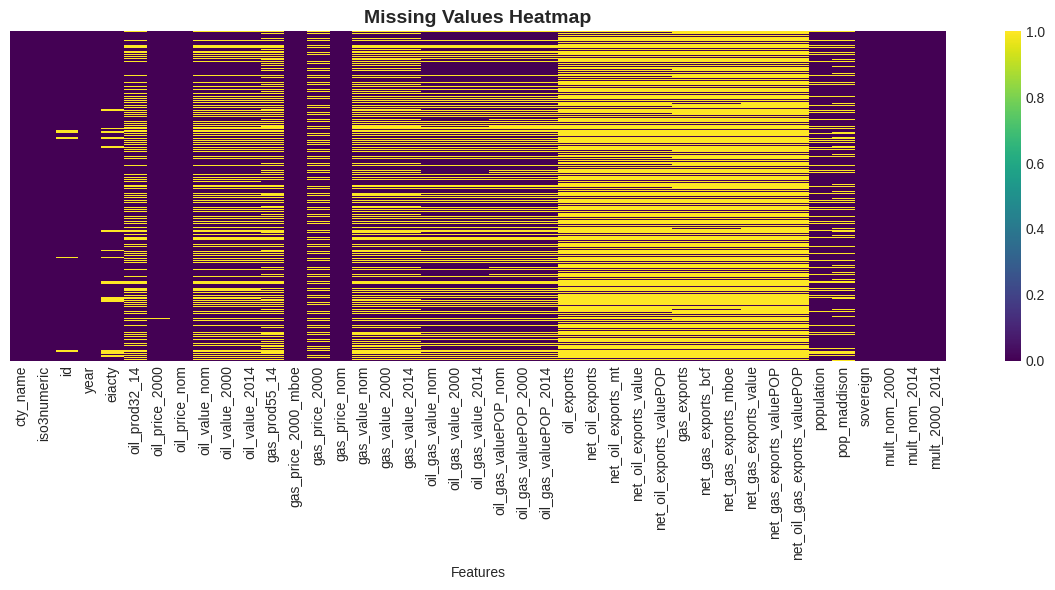


Total missing values: 217,560
Columns with missing data: 31


In [28]:
# Visualize missing values pattern
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

print(f"\nTotal missing values: {df.isnull().sum().sum():,}")
print(f"Columns with missing data: {(df.isnull().sum() > 0).sum()}")

### Distribution Analysis

In [29]:
# Basic statistics for key numerical columns
key_cols = ['oil_prod32_14', 'gas_prod55_14', 'oil_price_2000', 'oil_value_2000', 
            'gas_value_2000', 'population', 'year']
df[key_cols].describe()

,oil_prod32_14,gas_prod55_14,oil_price_2000,oil_value_2000,gas_value_2000,population,year
count,1.010300e+04,8812.000000,15503.000000,1.010300e+04,8.812000e+03,1.290100e+04,15521.000000
mean,1.834108e+07,100.702009,26.513076,4.777023e+09,2.130068e+09,2.822745e+07,1973.000000
std,6.384938e+07,462.242415,21.459869,2.100122e+10,1.074332e+10,9.860353e+07,23.959069
min,0.000000e+00,0.000000,7.879107,0.000000e+00,0.000000e+00,2.510100e+04,1932.000000
25%,0.000000e+00,0.000000,11.710310,0.000000e+00,0.000000e+00,2.194275e+06,1952.000000
50%,4.980000e+04,0.000000,14.067980,7.171990e+06,0.000000e+00,6.469000e+06,1973.000000
75%,4.025170e+06,21.684397,36.535130,6.935786e+08,4.045937e+08,1.932096e+07,1994.000000
max,6.160000e+08,5605.121816,85.170708,3.401958e+11,2.156113e+11,1.364270e+09,2014.000000


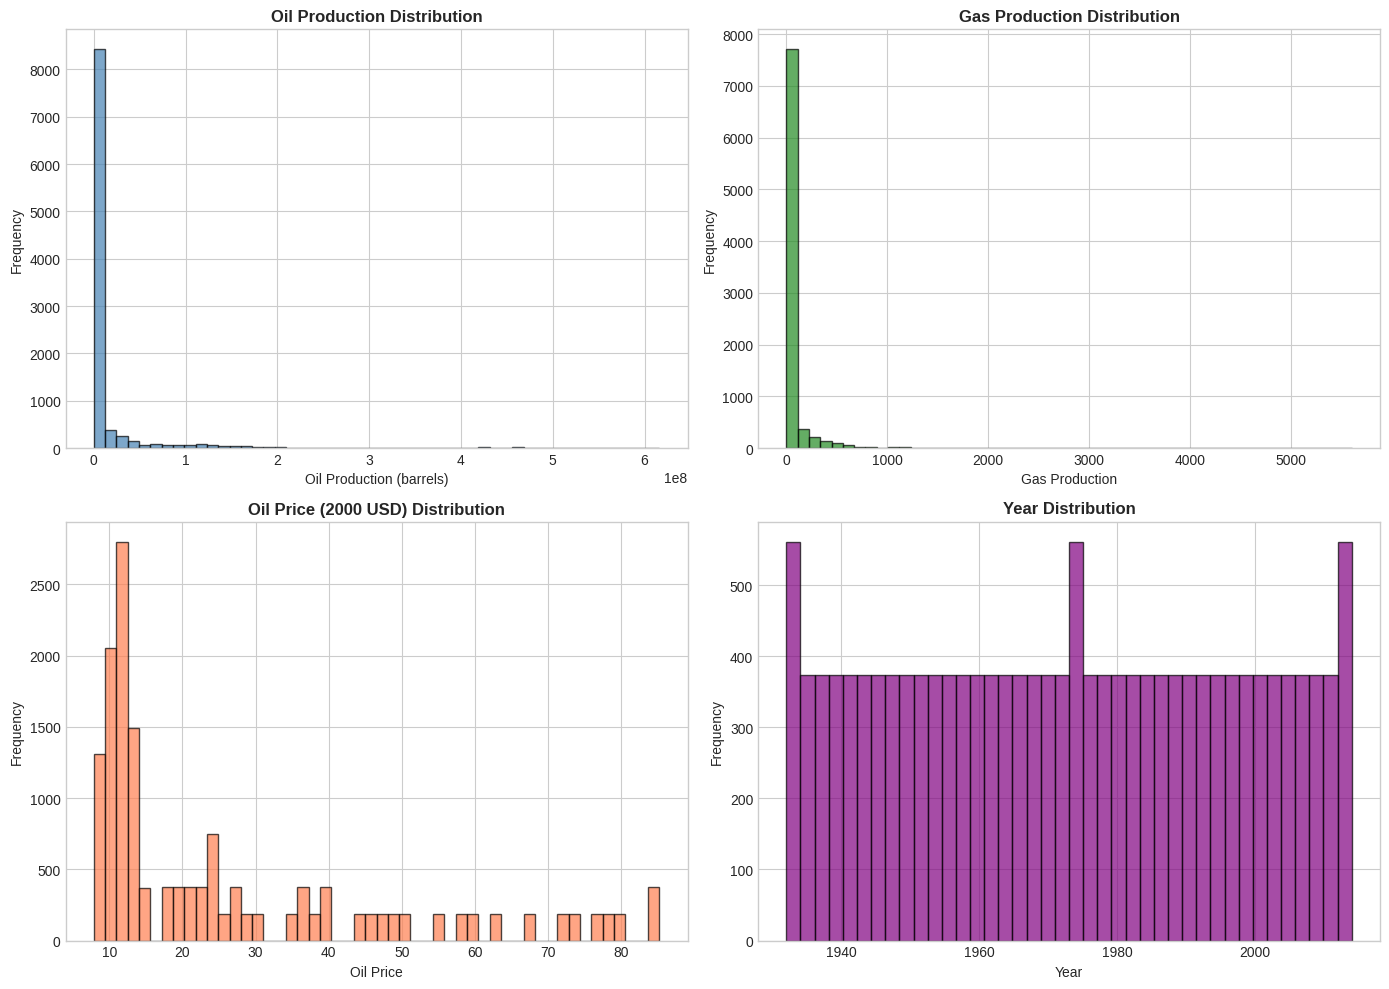

In [30]:
# Distribution plots for production columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Oil Production Distribution
ax1 = axes[0, 0]
df['oil_prod32_14'].dropna().hist(bins=50, ax=ax1, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_title('Oil Production Distribution', fontsize=12, fontweight='bold')
ax1.set_xlabel('Oil Production (barrels)')
ax1.set_ylabel('Frequency')

# Gas Production Distribution
ax2 = axes[0, 1]
df['gas_prod55_14'].dropna().hist(bins=50, ax=ax2, color='forestgreen', edgecolor='black', alpha=0.7)
ax2.set_title('Gas Production Distribution', fontsize=12, fontweight='bold')
ax2.set_xlabel('Gas Production')
ax2.set_ylabel('Frequency')

# Oil Price Distribution
ax3 = axes[1, 0]
df['oil_price_2000'].dropna().hist(bins=50, ax=ax3, color='coral', edgecolor='black', alpha=0.7)
ax3.set_title('Oil Price (2000 USD) Distribution', fontsize=12, fontweight='bold')
ax3.set_xlabel('Oil Price')
ax3.set_ylabel('Frequency')

# Year Distribution
ax4 = axes[1, 1]
df['year'].hist(bins=40, ax=ax4, color='purple', edgecolor='black', alpha=0.7)
ax4.set_title('Year Distribution', fontsize=12, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

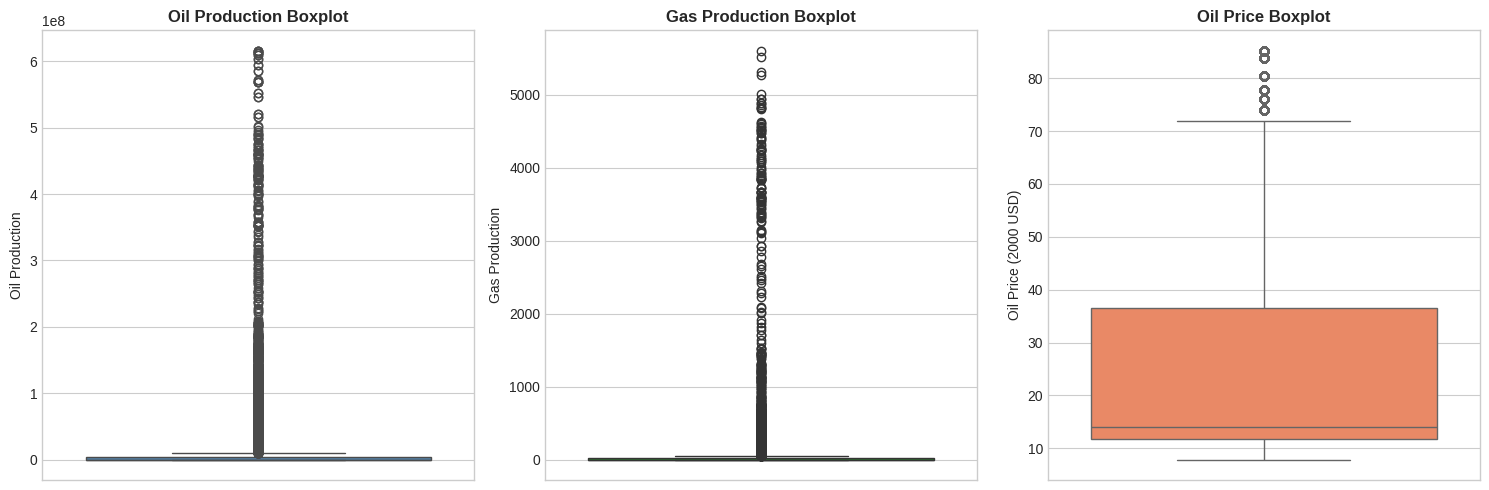

*Note: Production values are highly skewed with significant outliers (major oil producers)


In [31]:
# Box plots to identify outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=df['oil_prod32_14'].dropna(), ax=axes[0], color='steelblue')
axes[0].set_title('Oil Production Boxplot', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Oil Production')

sns.boxplot(y=df['gas_prod55_14'].dropna(), ax=axes[1], color='forestgreen')
axes[1].set_title('Gas Production Boxplot', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Gas Production')

sns.boxplot(y=df['oil_price_2000'].dropna(), ax=axes[2], color='coral')
axes[2].set_title('Oil Price Boxplot', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Oil Price (2000 USD)')

plt.tight_layout()
plt.show()

print("*Note: Production values are highly skewed with significant outliers (major oil producers)")

### Trend Analysis

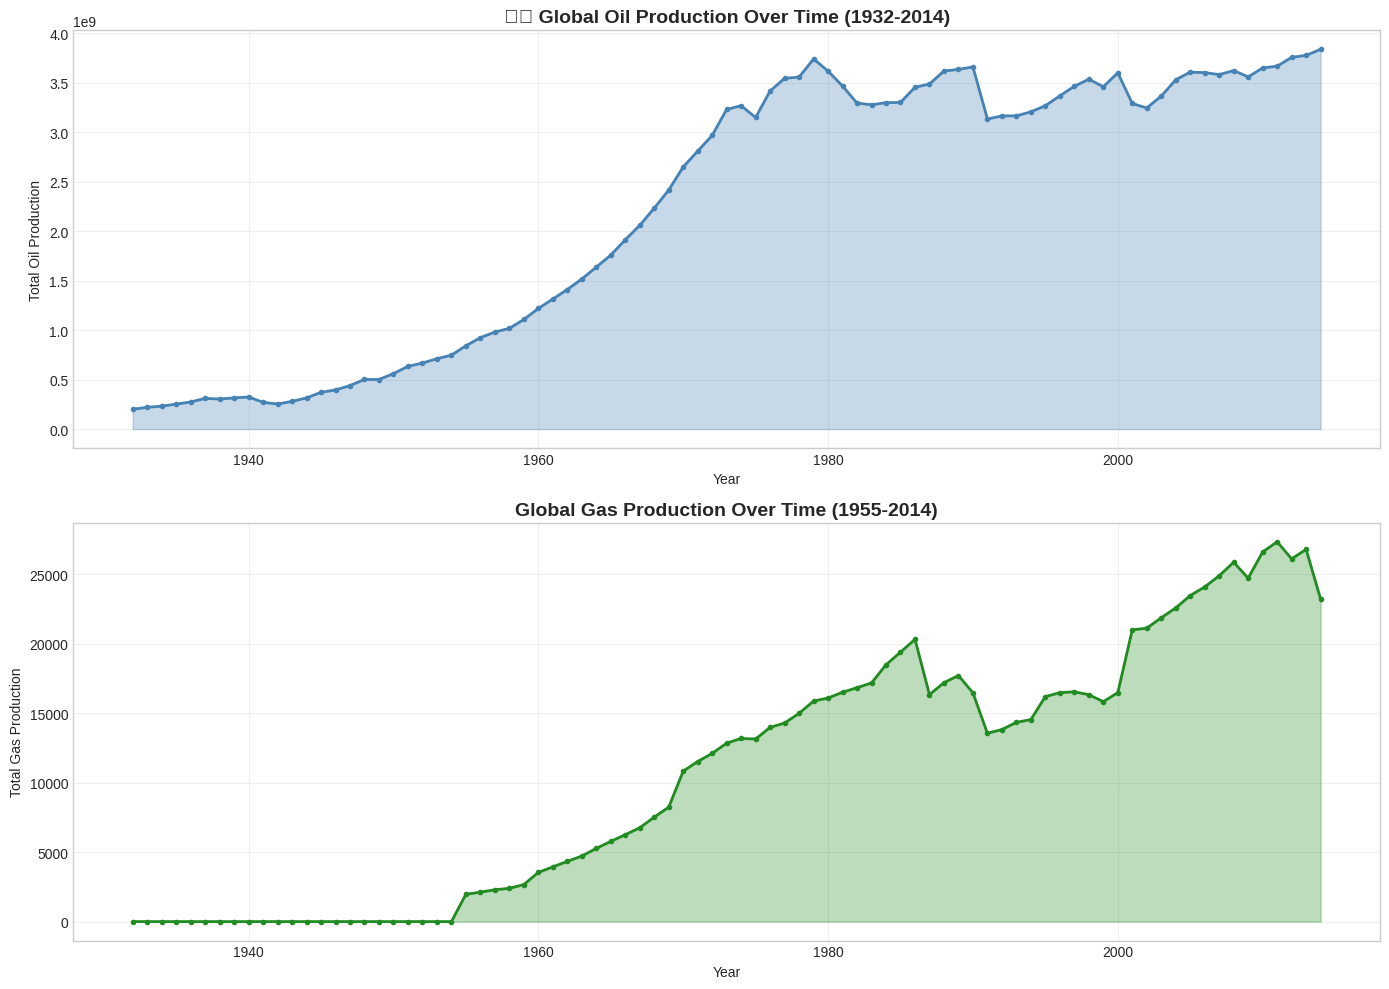

In [32]:
# Global oil and gas production trends over time
yearly_prod = df.groupby('year').agg({
    'oil_prod32_14': 'sum',
    'gas_prod55_14': 'sum',
    'oil_price_2000': 'mean'
}).reset_index()

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Oil Production Trend
ax1 = axes[0]
ax1.plot(yearly_prod['year'], yearly_prod['oil_prod32_14'], 
         color='steelblue', linewidth=2, marker='o', markersize=3)
ax1.fill_between(yearly_prod['year'], yearly_prod['oil_prod32_14'], alpha=0.3, color='steelblue')
ax1.set_title('🛢️ Global Oil Production Over Time (1932-2014)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Oil Production')
ax1.grid(True, alpha=0.3)

# Gas Production Trend
ax2 = axes[1]
ax2.plot(yearly_prod['year'], yearly_prod['gas_prod55_14'], 
         color='forestgreen', linewidth=2, marker='o', markersize=3)
ax2.fill_between(yearly_prod['year'], yearly_prod['gas_prod55_14'], alpha=0.3, color='forestgreen')
ax2.set_title('Global Gas Production Over Time (1955-2014)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Gas Production')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

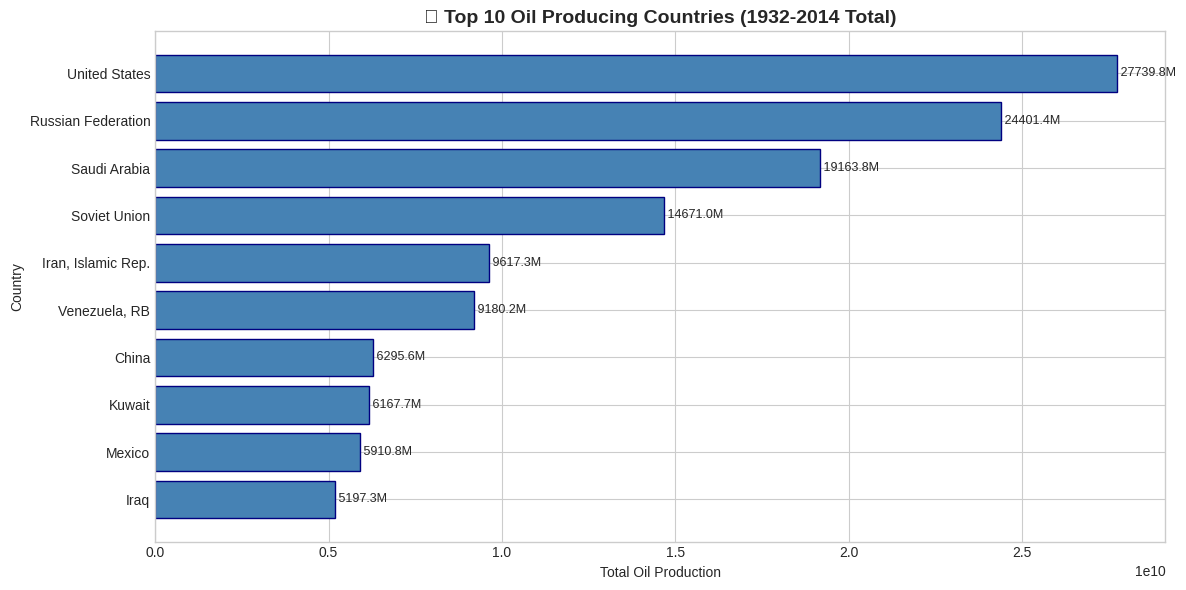

In [33]:
# Top 10 oil producing countries
top_oil_producers = df.groupby('cty_name')['oil_prod32_14'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(top_oil_producers.index[::-1], top_oil_producers.values[::-1], color='steelblue', edgecolor='navy')
ax.set_title('🏆 Top 10 Oil Producing Countries (1932-2014 Total)', fontsize=14, fontweight='bold')
ax.set_xlabel('Total Oil Production')
ax.set_ylabel('Country')

# Add value labels
for bar, value in zip(bars, top_oil_producers.values[::-1]):
    ax.text(value, bar.get_y() + bar.get_height()/2, f' {value/1e6:.1f}M', va='center', fontsize=9)

plt.tight_layout()
plt.show()

### Correlation Analysis

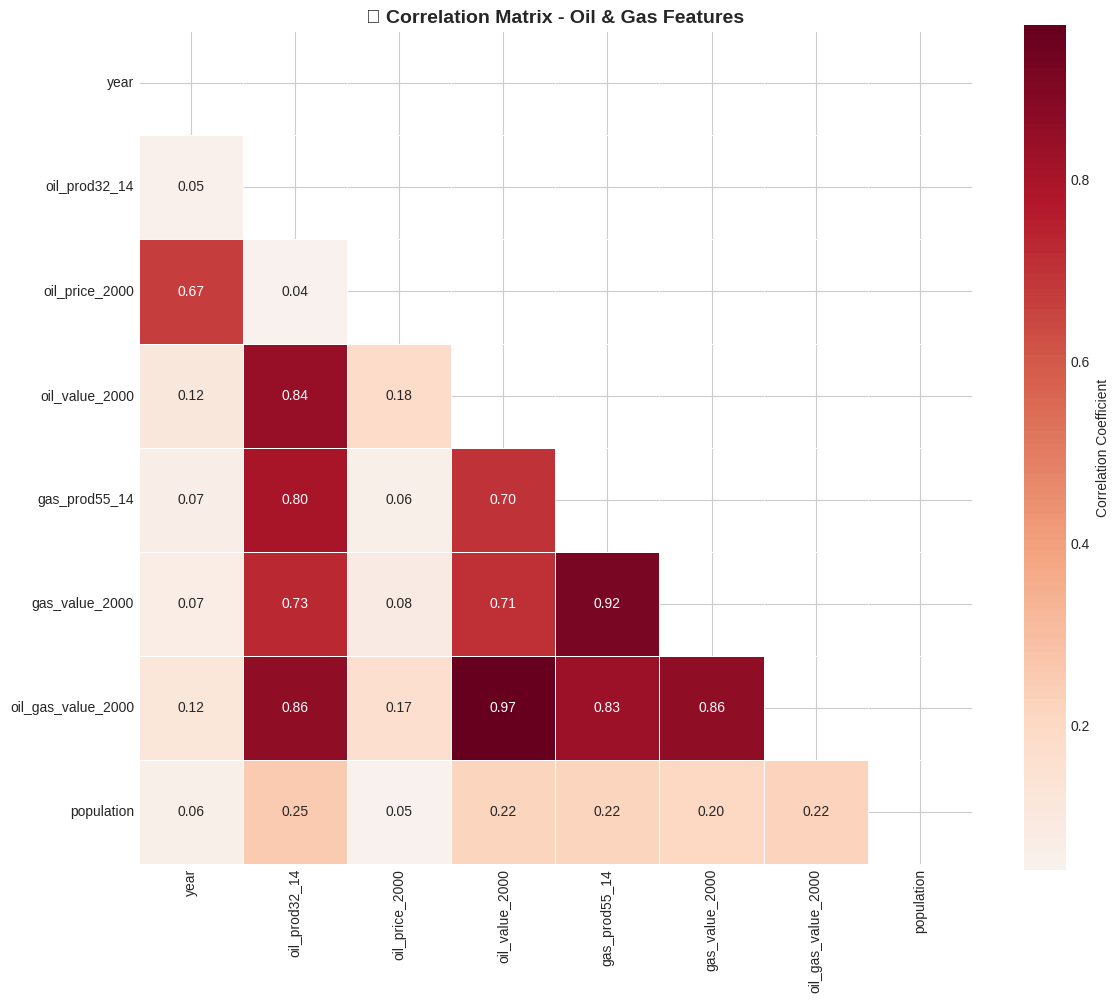


Key Correlations with Oil Production:
oil_prod32_14         1.000000
oil_gas_value_2000    0.858420
oil_value_2000        0.842378
gas_prod55_14         0.797145
gas_value_2000        0.727620
population            0.253938
year                  0.051194
oil_price_2000        0.040544


In [34]:
# Select numerical columns for correlation analysis
num_cols = ['year', 'oil_prod32_14', 'oil_price_2000', 'oil_value_2000', 
            'gas_prod55_14', 'gas_value_2000', 'oil_gas_value_2000', 'population']

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Visualize correlation heatmap
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            mask=mask, square=True, linewidths=0.5, ax=ax,
            cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('🔗 Correlation Matrix - Oil & Gas Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Correlations with Oil Production:")
oil_corr = corr_matrix['oil_prod32_14'].sort_values(ascending=False)
print(oil_corr.to_string())

## 3️⃣ Feature Preparation

### Data Cleaning and Feature Selection

In [35]:
# Prepare data for modeling
# Target: Predict oil production value (oil_value_2000)
# Features: year, oil production, oil price, gas production, population

# Select relevant columns and drop rows with missing target
model_cols = ['year', 'oil_prod32_14', 'oil_price_2000', 'gas_prod55_14', 'population', 'oil_value_2000']
df_model = df[model_cols].copy()

print(f"Original rows: {len(df_model):,}")
print(f"Missing values before cleaning:")
print(df_model.isnull().sum())

# Drop rows with any missing values
df_model = df_model.dropna()
print(f"\n✅ Rows after cleaning: {len(df_model):,}")
print(f"Rows dropped: {len(df) - len(df_model):,}")

Original rows: 15,521
Missing values before cleaning:
year                 0
oil_prod32_14     5418
oil_price_2000      18
gas_prod55_14     6709
population        2620
oil_value_2000    5418
dtype: int64

✅ Rows after cleaning: 8,660
Rows dropped: 6,861


In [36]:
# Define features (X) and target (y)
feature_cols = ['year', 'oil_prod32_14', 'oil_price_2000', 'gas_prod55_14', 'population']
target_col = 'oil_value_2000'

X = df_model[feature_cols]
y = df_model[target_col]

print("Features:", feature_cols)
print(f"Target: {target_col}")
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Features: ['year', 'oil_prod32_14', 'oil_price_2000', 'gas_prod55_14', 'population']
Target: oil_value_2000

Feature matrix shape: (8660, 5)
Target vector shape: (8660,)


### Feature Scaling and Train-Test Split

In [37]:
# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("📊 Train-Test Split:")
print(f"   Training samples: {len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Testing samples:  {len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)")

📊 Train-Test Split:
   Training samples: 6,928 (80.0%)
   Testing samples:  1,732 (20.0%)


In [38]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_cols)

print("✅ Features scaled using StandardScaler")
print("\nScaled Feature Statistics (Training Set):")
print(X_train_scaled.describe().round(2))

✅ Features scaled using StandardScaler

Scaled Feature Statistics (Training Set):
          year  oil_prod32_14  oil_price_2000  gas_prod55_14  population
count  6928.00        6928.00         6928.00        6928.00     6928.00
mean      0.00           0.00            0.00           0.00        0.00
std       1.00           1.00            1.00           1.00        1.00
min      -2.08          -0.30           -1.16          -0.22       -0.29
25%      -0.82          -0.30           -0.70          -0.22       -0.26
50%       0.07          -0.30           -0.34          -0.22       -0.22
75%       0.89          -0.23            0.67          -0.17       -0.09
max       1.65           9.01            2.24          12.52       12.02


## 4️⃣ Model Training - Linear Regression

In [39]:
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

print("✅ Linear Regression Model Trained!")
print("\nModel Coefficients:")
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(coef_df.to_string(index=False))
print(f"\nIntercept: {lr_model.intercept_:.4f}")

✅ Linear Regression Model Trained!

Model Coefficients:
       Feature   Coefficient
 oil_prod32_14  1.850443e+10
oil_price_2000  3.549215e+09
          year -3.174619e+08
    population  2.561104e+08
 gas_prod55_14 -2.214321e+08

Intercept: 5272138834.0898


In [40]:
# Generate predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

print("Predictions generated for both train and test sets")

Predictions generated for both train and test sets


## 5️⃣ Model Evaluation

In [41]:
# Calculate evaluation metrics
def evaluate_model(y_true, y_pred, set_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'Set': set_name, 'RMSE': rmse, 'MAE': mae, 'R²': r2}

# Evaluate on both sets
train_metrics = evaluate_model(y_train, y_train_pred, 'Training')
test_metrics = evaluate_model(y_test, y_test_pred, 'Testing')

# Display results
metrics_df = pd.DataFrame([train_metrics, test_metrics])
print("=" * 60)
print("MODEL EVALUATION RESULTS - LINEAR REGRESSION")
print("=" * 60)
print(metrics_df.to_string(index=False))
print("=" * 60)

MODEL EVALUATION RESULTS - LINEAR REGRESSION
     Set         RMSE          MAE       R²
Training 1.115640e+10 4.557229e+09 0.739496
 Testing 1.269502e+10 4.985783e+09 0.747007


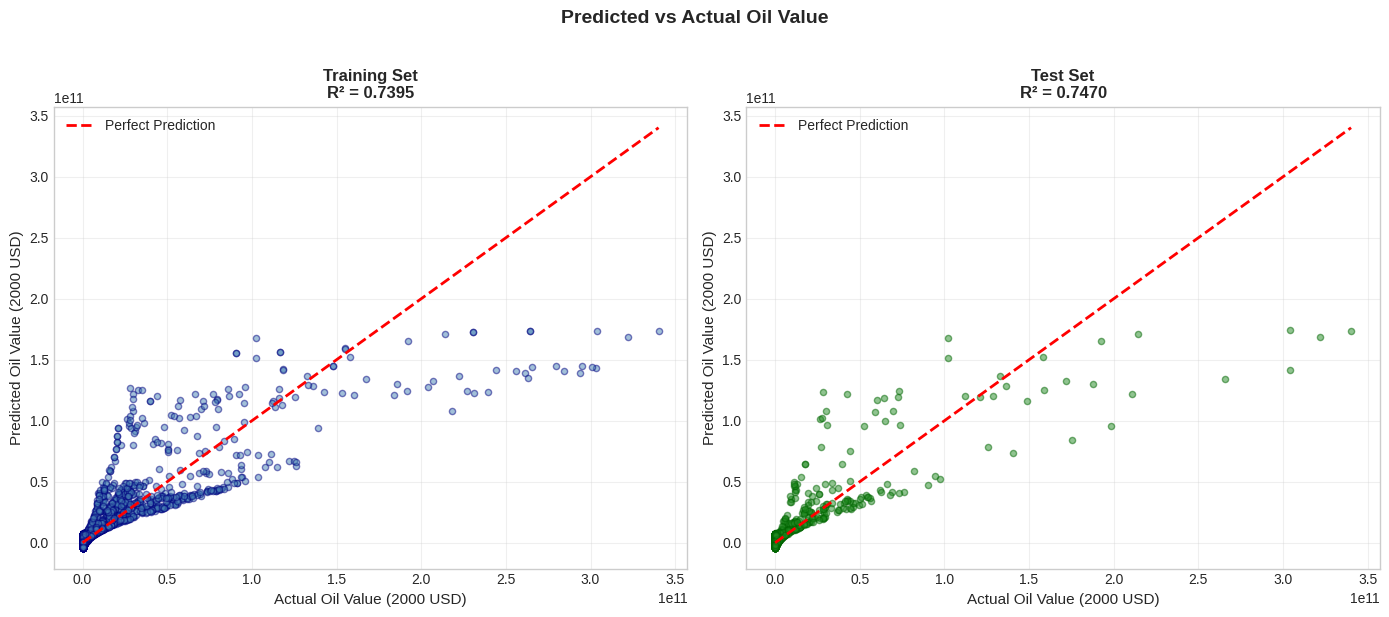

In [42]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training set
ax1 = axes[0]
ax1.scatter(y_train, y_train_pred, alpha=0.5, s=20, c='steelblue', edgecolors='navy')
max_val = max(y_train.max(), y_train_pred.max())
ax1.plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Oil Value (2000 USD)', fontsize=11)
ax1.set_ylabel('Predicted Oil Value (2000 USD)', fontsize=11)
ax1.set_title(f'Training Set\nR² = {train_metrics["R²"]:.4f}', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Test set
ax2 = axes[1]
ax2.scatter(y_test, y_test_pred, alpha=0.5, s=20, c='forestgreen', edgecolors='darkgreen')
max_val = max(y_test.max(), y_test_pred.max())
ax2.plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Oil Value (2000 USD)', fontsize=11)
ax2.set_ylabel('Predicted Oil Value (2000 USD)', fontsize=11)
ax2.set_title(f'Test Set\nR² = {test_metrics["R²"]:.4f}', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.suptitle('Predicted vs Actual Oil Value', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

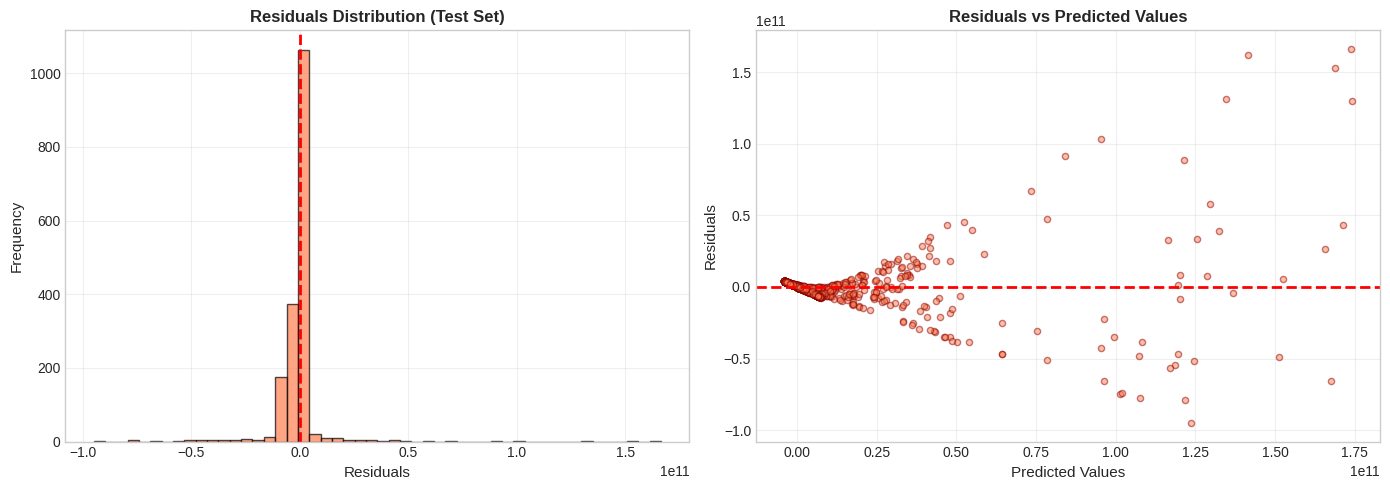

Mean Residual: 92356262.8217
Std Residual: 12698346855.0980


In [43]:
# Residual Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residuals distribution
residuals = y_test - y_test_pred
ax1 = axes[0]
ax1.hist(residuals, bins=50, color='coral', edgecolor='black', alpha=0.7)
ax1.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax1.set_xlabel('Residuals', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Residuals Distribution (Test Set)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Residuals vs Predicted
ax2 = axes[1]
ax2.scatter(y_test_pred, residuals, alpha=0.5, s=20, c='coral', edgecolors='darkred')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Predicted Values', fontsize=11)
ax2.set_ylabel('Residuals', fontsize=11)
ax2.set_title('Residuals vs Predicted Values', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean Residual: {residuals.mean():.4f}")
print(f"Std Residual: {residuals.std():.4f}")

## 📋 Summary and Conclusions

In [44]:
# Final Summary
print("=" * 70)
print("🛢️  OIL & GAS PRODUCTION ANALYSIS - FINAL SUMMARY")
print("=" * 70)

print("\nDATASET OVERVIEW:")
print(f"   • Total records: {len(df):,}")
print(f"   • Time period: 1932-2014")
print(f"   • Countries covered: {df['cty_name'].nunique()}")
print(f"   • Records used for modeling: {len(df_model):,}")

print("\nKEY EDA FINDINGS:")
print("   • Oil production shows significant variation across countries")
print("   • Strong correlation between oil production and oil value")
print("   • Global production has generally increased over time")
print("   • Top producers: USA, Russia, Saudi Arabia dominate")

print("\nMODEL PERFORMANCE - LINEAR REGRESSION:")
print(f"   • Training R²: {train_metrics['R²']:.4f}")
print(f"   • Test R²:     {test_metrics['R²']:.4f}")
print(f"   • Test RMSE:   {test_metrics['RMSE']:,.2f}")
print(f"   • Test MAE:    {test_metrics['MAE']:,.2f}")

print("\nFEATURE IMPORTANCE (by coefficient magnitude):")
for idx, row in coef_df.iterrows():
    print(f"   • {row['Feature']}: {row['Coefficient']:.4f}")

print("\nCONCLUSIONS:")
print("   • Linear Regression provides a good baseline for predicting oil value")
print("   • Oil production volume is the most important predictor")
print("   • Model generalizes well (similar train/test performance)")
print("   • Further improvements possible with more complex models")
print("=" * 70)

🛢️  OIL & GAS PRODUCTION ANALYSIS - FINAL SUMMARY

DATASET OVERVIEW:
   • Total records: 15,521
   • Time period: 1932-2014
   • Countries covered: 187
   • Records used for modeling: 8,660

KEY EDA FINDINGS:
   • Oil production shows significant variation across countries
   • Strong correlation between oil production and oil value
   • Global production has generally increased over time
   • Top producers: USA, Russia, Saudi Arabia dominate

MODEL PERFORMANCE - LINEAR REGRESSION:
   • Training R²: 0.7395
   • Test R²:     0.7470
   • Test RMSE:   12,695,016,471.71
   • Test MAE:    4,985,783,252.28

FEATURE IMPORTANCE (by coefficient magnitude):
   • oil_prod32_14: 18504431018.6252
   • oil_price_2000: 3549215228.8604
   • year: -317461865.9202
   • population: 256110446.4486
   • gas_prod55_14: -221432127.5924

CONCLUSIONS:
   • Linear Regression provides a good baseline for predicting oil value
   • Oil production volume is the most important predictor
   • Model generalizes well (